# Neural Networks: CIFAR10

In [66]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Conv2D, BatchNormalization, Dropout,Input

#### The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class.

<!DOCTYPE html><html lang="en"><head><meta charset="UTF-8"><meta name="viewport" content="width=device-width, initial-scale=1.0"><title>Label Description Table</title><style>table { width: 50%; border-collapse: collapse; margin: 25px 0; font-size: 18px; text-align: left; } th, td { padding: 12px; border-bottom: 1px solid #ddd; } th { background-color: #f2f2f2; }</style></head><body><table><thead><tr><th>Label</th><th>Description</th></tr></thead><tbody><tr><td>0</td><td>airplane</td></tr><tr><td>1</td><td>automobile</td></tr><tr><td>2</td><td>bird</td></tr><tr><td>3</td><td>cat</td></tr><tr><td>4</td><td>deer</td></tr><tr><td>5</td><td>dog</td></tr><tr><td>6</td><td>frog</td></tr><tr><td>7</td><td>horse</td></tr><tr><td>8</td><td>ship</td></tr><tr><td>9</td><td>truck</td></tr></tbody></table></body></html>

Let's download Cifar10 dataset:

In [18]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

Normalization + One hot encoding

In [19]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

Let's see some example of input picture.

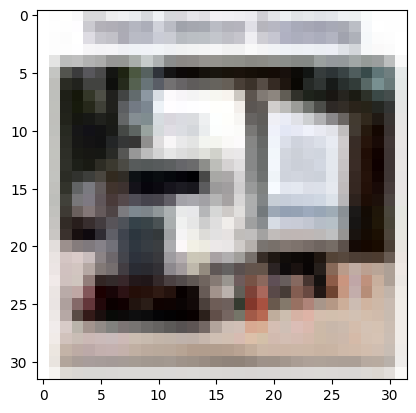

In [48]:
image = x_train[666]
plt.imshow(image)

#### Dense NN

In [15]:
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3))) 
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2564 - loss: 2.0599 - val_accuracy: 0.3638 - val_loss: 1.8094
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3517 - loss: 1.8251 - val_accuracy: 0.3655 - val_loss: 1.7830
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3649 - loss: 1.7710 - val_accuracy: 0.3664 - val_loss: 1.7631
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3691 - loss: 1.7501 - val_accuracy: 0.3640 - val_loss: 1.7678
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3824 - loss: 1.7263 - val_accuracy: 0.3929 - val_loss: 1.7093
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3916 - loss: 1.7011 - val_accuracy: 0.3984 - val_loss: 1.6952
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3933 - loss: 1.6918 - val_accuracy: 0.4038 - val_loss: 1.6837
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3957 - loss: 1.6797 - val_accuracy: 0.

In [16]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.3f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - accuracy: 0.3970 - loss: 1.6703
Test accuracy: 0.400


Okay, we can see that the simplest dense network gives 40% accuracy on the test set.\
Now let's make the model more complex, considering that 40% accuracy is the minimum acceptable value.

In [17]:
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3))) 
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.2491 - loss: 2.0269 - val_accuracy: 0.3663 - val_loss: 1.7326
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.3810 - loss: 1.7157 - val_accuracy: 0.4084 - val_loss: 1.6399
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.4121 - loss: 1.6272 - val_accuracy: 0.4334 - val_loss: 1.5811
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.4469 - loss: 1.5411 - val_accuracy: 0.4413 - val_loss: 1.5640
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.4621 - loss: 1.5057 - val_accuracy: 0.4640 - val_loss: 1.5061
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.4664 - loss: 1.4769 - val_accuracy: 0.4732 - val_loss: 1.4836
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.4921 - loss: 1.4215 - val_accuracy: 0.4769 - val_loss: 1.4572
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.5013 - loss: 1.3965 - 

In [20]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.3f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4826 - loss: 1.4543
Test accuracy: 0.481


The accuracy on the test sample is 48.1%.\
This is a pretty good result for such a dense network.\
Let's take a look at the accuracy and loss plots.

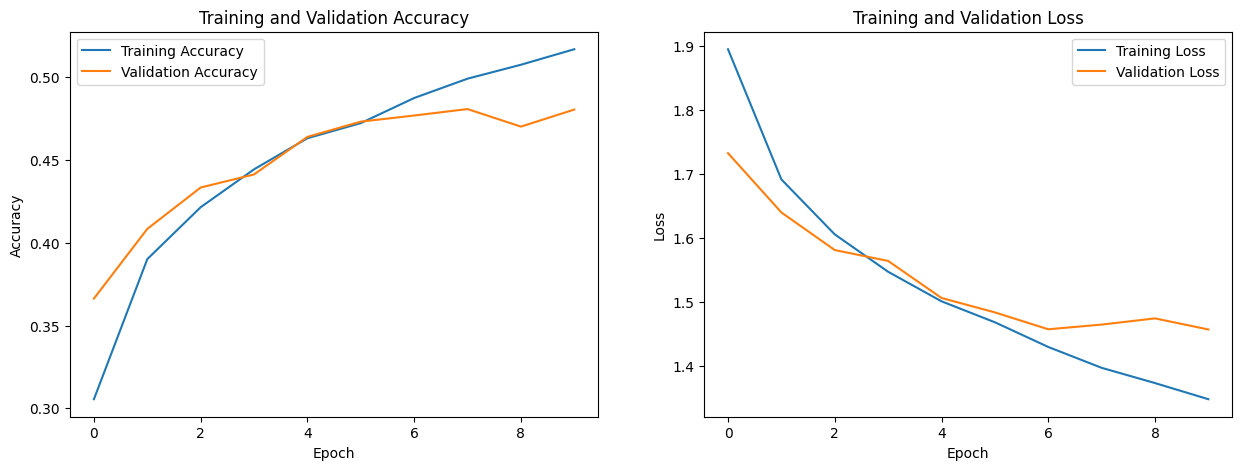

In [21]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# accuracy
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# loss
plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

Not bad. Let's try to increase the number of epochs, maybe we can improve the accuracy.

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.2597 - loss: 2.0171 - val_accuracy: 0.3667 - val_loss: 1.7643
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.3826 - loss: 1.7136 - val_accuracy: 0.3932 - val_loss: 1.6920
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.4186 - loss: 1.6231 - val_accuracy: 0.4406 - val_loss: 1.5907
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.4459 - loss: 1.5465 - val_accuracy: 0.4441 - val_loss: 1.5630
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.4608 - loss: 1.5093 - val_accuracy: 0.4691 - val_loss: 1.4924
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.4779 - loss: 1.4597 - val_accuracy: 0.4805 - val_loss: 1.4585
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.4886 - loss: 1.4303 - val_accuracy: 0.4689 - val_loss: 1.4716
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.4973 - loss: 1.4081 - 

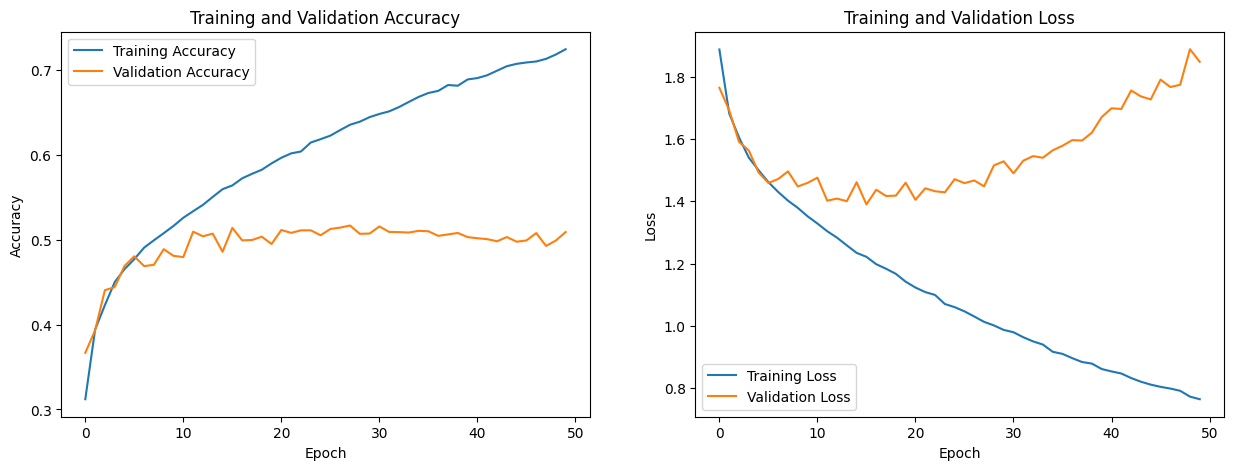

In [25]:
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3))) 
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_test, y_test))

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.3f}')

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# accuracy
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# loss
plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

Well, we were able to improve the test accuracy to 50.9%, but the graph shows that there is overfitting.\
Let's focus on 15 epochs.

In [26]:
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3))) 
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=15, batch_size=64, validation_data=(x_test, y_test))

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.3f}')

Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.2476 - loss: 2.0414 - val_accuracy: 0.3772 - val_loss: 1.7300
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.3864 - loss: 1.7030 - val_accuracy: 0.4152 - val_loss: 1.6288
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.4199 - loss: 1.6094 - val_accuracy: 0.4479 - val_loss: 1.5564
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.4484 - loss: 1.5362 - val_accuracy: 0.4402 - val_loss: 1.5769
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.4602 - loss: 1.4979 - val_accuracy: 0.4524 - val_loss: 1.5394
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.4743 - loss: 1.4652 - val_accuracy: 0.4744 - val_loss: 1.4750
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.4900 - loss: 1.4207 - val_accuracy: 0.4832 - val_loss: 1.4571
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.5051 - loss: 1.3926 - 

Well, about ~50% is our best result so far.\
Let's move on to another type of model, the convolutional neural network (CNN) model.\
CNN is better suited to our task because it can use the information about shapes and edges from our input (images).

#### CNN

c:\Users\duina\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.3508 - loss: 1.7618 - val_accuracy: 0.5394 - val_loss: 1.2789
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.5589 - loss: 1.2460 - val_accuracy: 0.6019 - val_loss: 1.1197
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.6201 - loss: 1.0790 - val_accuracy: 0.6360 - val_loss: 1.0399
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.6641 - loss: 0.9620 - val_accuracy: 0.6525 - val_loss: 1.0000
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.6905 - loss: 0.8789 - val_accuracy: 0.6703 - val_loss: 0.9452
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.7208 - loss: 0.8069 - val_accuracy: 0.6990 - val_loss: 0.8793
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.7324 - loss: 0.7612 - val_accuracy: 0.6974 - val_loss: 0.8772
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.7485 - loss: 0.7159 - 

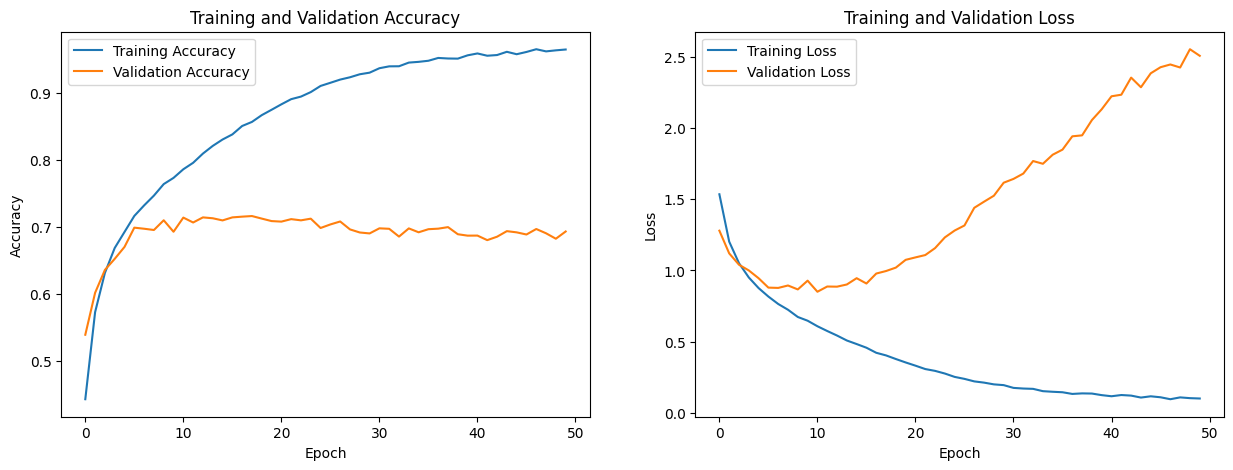

In [28]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_test, y_test))

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.3f}')

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# accuracy
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# loss
plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

Obviously, the neural network is overfitting. \
From the figures, we conclude that 10 epochs will be enough.\
Therefore, in the future, to improve and complicate the model, we will rely on 10 epochs.

In [30]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.3f}')

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.3282 - loss: 1.8228 - val_accuracy: 0.5310 - val_loss: 1.2992
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.5452 - loss: 1.2672 - val_accuracy: 0.5443 - val_loss: 1.2756
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.6076 - loss: 1.1175 - val_accuracy: 0.6131 - val_loss: 1.0759
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.6482 - loss: 1.0007 - val_accuracy: 0.6341 - val_loss: 1.0498
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.6821 - loss: 0.9011 - val_accuracy: 0.6559 - val_loss: 0.9725
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.7044 - loss: 0.8407 - val_accuracy: 0.6895 - val_loss: 0.8976
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.7305 - loss: 0.7783 - val_accuracy: 0.6881 - val_loss: 0.8930
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.7417 - loss: 0.7379 - 

Cool, we were able to increase the accuracy level on the test data up to 70.9%!\
Now let's try to improve the result by making our CNN more complex.

First, let's add batch normalization (after layer with activation!) and see if it improves the model.

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 37ms/step - accuracy: 0.4251 - loss: 1.6274 - val_accuracy: 0.5920 - val_loss: 1.1556
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.6339 - loss: 1.0363 - val_accuracy: 0.6322 - val_loss: 1.0653
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.6956 - loss: 0.8654 - val_accuracy: 0.6778 - val_loss: 0.9334
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.7359 - loss: 0.7551 - val_accuracy: 0.7012 - val_loss: 0.8603
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 35ms/step - accuracy: 0.7678 - loss: 0.6690 - val_accuracy: 0.6810 - val_loss: 0.9573
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 35ms/step - accuracy: 0.7860 - loss: 0.6155 - val_accuracy: 0.6937 - val_loss: 0.9071
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.8039 - loss: 0.5667 - val_accuracy: 0.5786 - val_loss: 1.5027
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 40ms/step - accuracy: 0.8224 - loss: 0.5169 - 

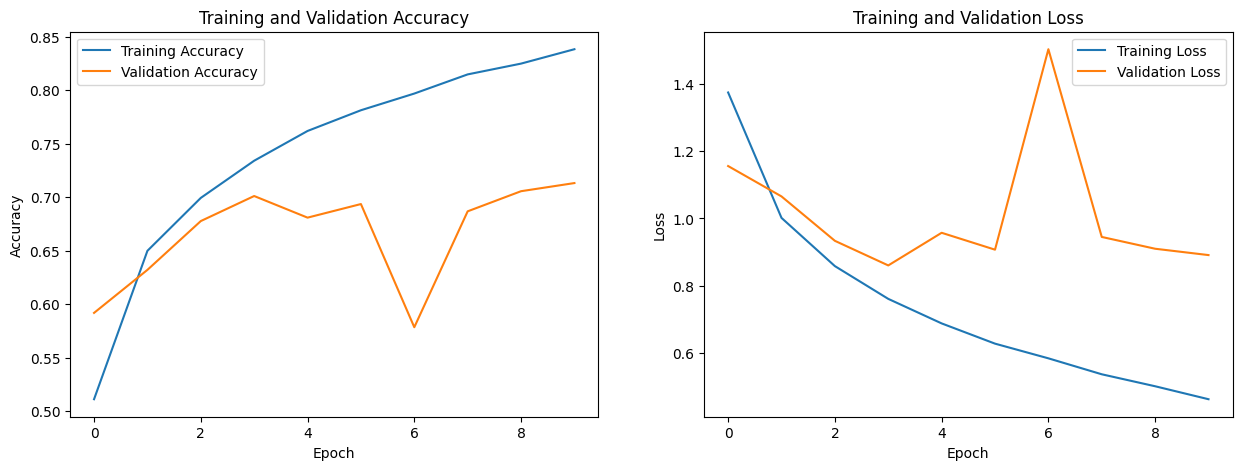

In [51]:
model = Sequential([
    Input(shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))


def plot_loss_and_accuracy(history):
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # accuracy
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.plot(accuracy, label='Training Accuracy')
    plt.plot(val_accuracy, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    # loss
    plt.subplot(1, 2, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

plot_loss_and_accuracy(history=history)
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.3f}')

Okay, we see some improvement.\
Let's add another Dense layer so that the model can capture more complex patterns in the data.

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 38ms/step - accuracy: 0.4126 - loss: 1.6609 - val_accuracy: 0.5523 - val_loss: 1.2880
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.6217 - loss: 1.0720 - val_accuracy: 0.6186 - val_loss: 1.0903
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.6916 - loss: 0.8817 - val_accuracy: 0.6162 - val_loss: 1.0991
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.7294 - loss: 0.7711 - val_accuracy: 0.6436 - val_loss: 1.0199
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.7583 - loss: 0.6871 - val_accuracy: 0.6909 - val_loss: 0.8951
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.7817 - loss: 0.6254 - val_accuracy: 0.6616 - val_loss: 1.0015
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.7973 - loss: 0.5779 - val_accuracy: 0.6799 - val_loss: 0.9976
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.8166 - loss: 0.5204 - 

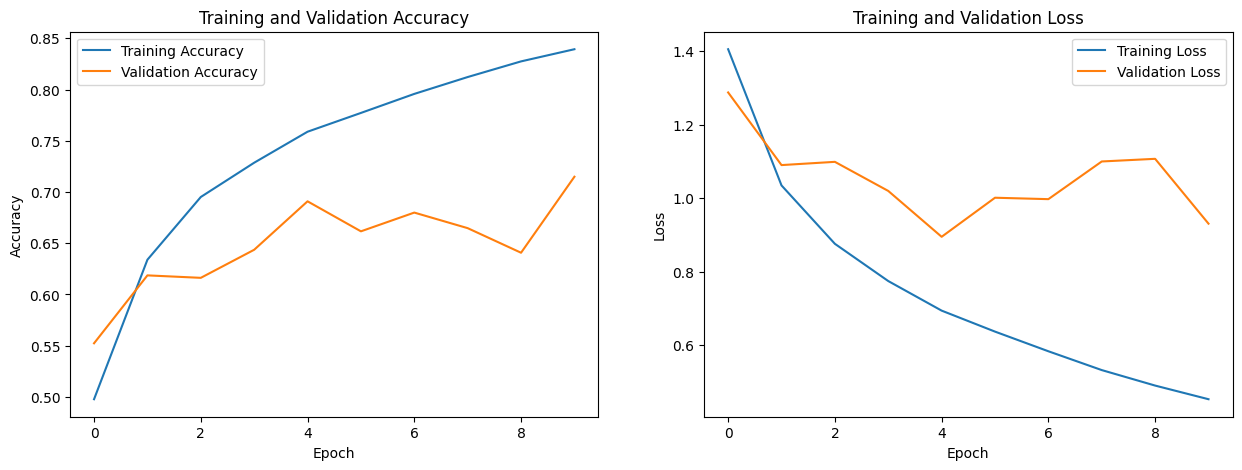

In [53]:
model = Sequential([
    Input(shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

plot_loss_and_accuracy(history=history)
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.3f}')

Well, the accuracy hasn't improved.\
Adding a new Dense layer often results in overtraining the model, so let's add dropout layers for regularization (after BatchNormalization!).

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 35ms/step - accuracy: 0.2700 - loss: 2.2312 - val_accuracy: 0.4626 - val_loss: 1.5254
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.4886 - loss: 1.4169 - val_accuracy: 0.5194 - val_loss: 1.3186
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.5719 - loss: 1.2232 - val_accuracy: 0.5267 - val_loss: 1.2982
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.6206 - loss: 1.0950 - val_accuracy: 0.4708 - val_loss: 1.5552
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 34ms/step - accuracy: 0.6615 - loss: 0.9941 - val_accuracy: 0.6318 - val_loss: 1.0597
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 38ms/step - accuracy: 0.6861 - loss: 0.9299 - val_accuracy: 0.6806 - val_loss: 0.9338
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 37ms/step - accuracy: 0.7086 - loss: 0.8633 - val_accuracy: 0.6477 - val_loss: 1.0332
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.7269 - loss: 0.8090 - 

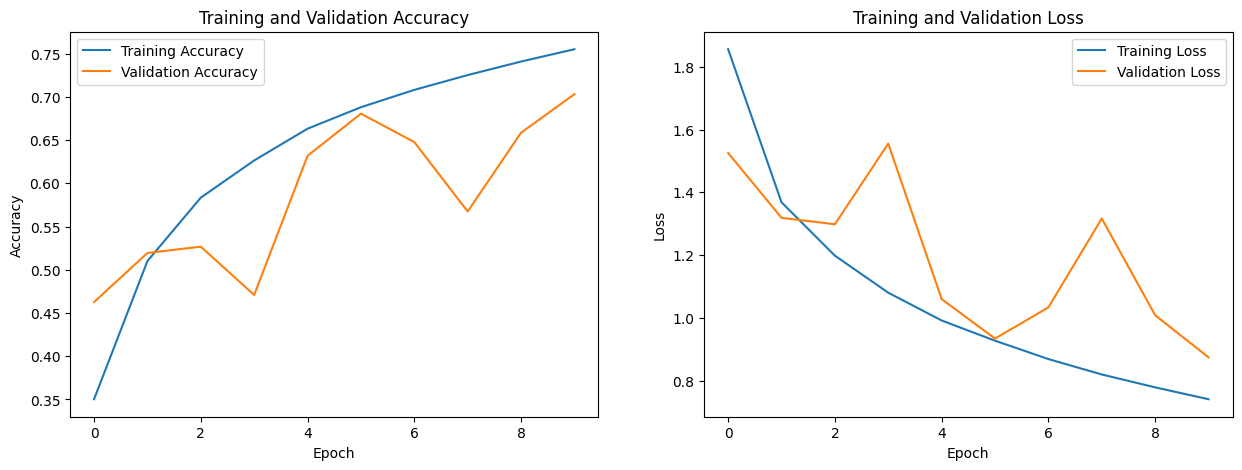

In [54]:
model = Sequential([
    Input(shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

plot_loss_and_accuracy(history=history)
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.3f}')

It's terrible, we got even a little worse, maybe more epochs would have played into our hands in this situation.\
However, let's try adding dropout layers after each convolutional layer.

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 39ms/step - accuracy: 0.2083 - loss: 2.4938 - val_accuracy: 0.4191 - val_loss: 1.5737
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.3842 - loss: 1.6526 - val_accuracy: 0.4901 - val_loss: 1.3880
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.4596 - loss: 1.4861 - val_accuracy: 0.5292 - val_loss: 1.3497
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.5062 - loss: 1.3805 - val_accuracy: 0.5163 - val_loss: 1.3838
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.5409 - loss: 1.2902 - val_accuracy: 0.5903 - val_loss: 1.1524
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 40ms/step - accuracy: 0.5669 - loss: 1.2391 - val_accuracy: 0.5517 - val_loss: 1.3013
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.5869 - loss: 1.1913 - val_accuracy: 0.6030 - val_loss: 1.1103
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.6039 - loss: 1.1470 - 

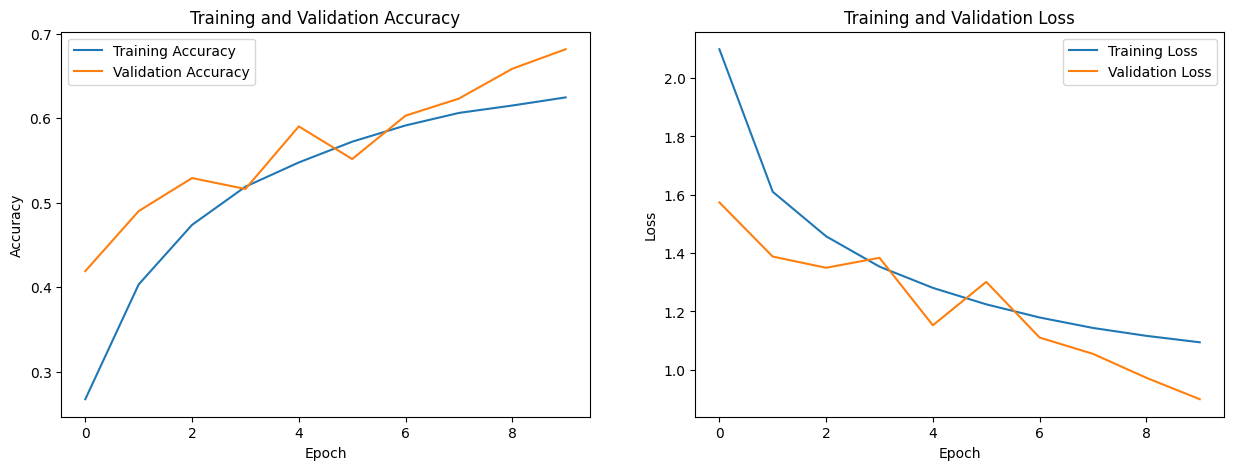

In [55]:
model = Sequential([
    Input(shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

plot_loss_and_accuracy(history=history)
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.3f}')

Very interesting, the accuracy dropped a bit again, but the figures show that the test accuracy is consistently better than the training accuracy.\
We must be on the right track. Let's try adding more convolutional layers and see what happens (also, we must set the padding of the Conv2D layers to "same" to avoid tensor dimensionality conflicts).

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 54s 63ms/step - accuracy: 0.2250 - loss: 2.4218 - val_accuracy: 0.4425 - val_loss: 1.4830
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 60ms/step - accuracy: 0.4141 - loss: 1.5790 - val_accuracy: 0.4492 - val_loss: 1.4334
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 53s 68ms/step - accuracy: 0.4961 - loss: 1.3891 - val_accuracy: 0.5092 - val_loss: 1.3775
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 59s 75ms/step - accuracy: 0.5514 - loss: 1.2682 - val_accuracy: 0.5628 - val_loss: 1.1931
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 53s 68ms/step - accuracy: 0.5950 - loss: 1.1552 - val_accuracy: 0.5175 - val_loss: 1.4382
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 52s 67ms/step - accuracy: 0.6189 - loss: 1.0923 - val_accuracy: 0.6888 - val_loss: 0.8744
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 54s 69ms/step - accuracy: 0.6438 - loss: 1.0383 - val_accuracy: 0.7141 - val_loss: 0.8146
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 54s 69ms/step - accuracy: 0.6665 - loss: 0.9841 - 

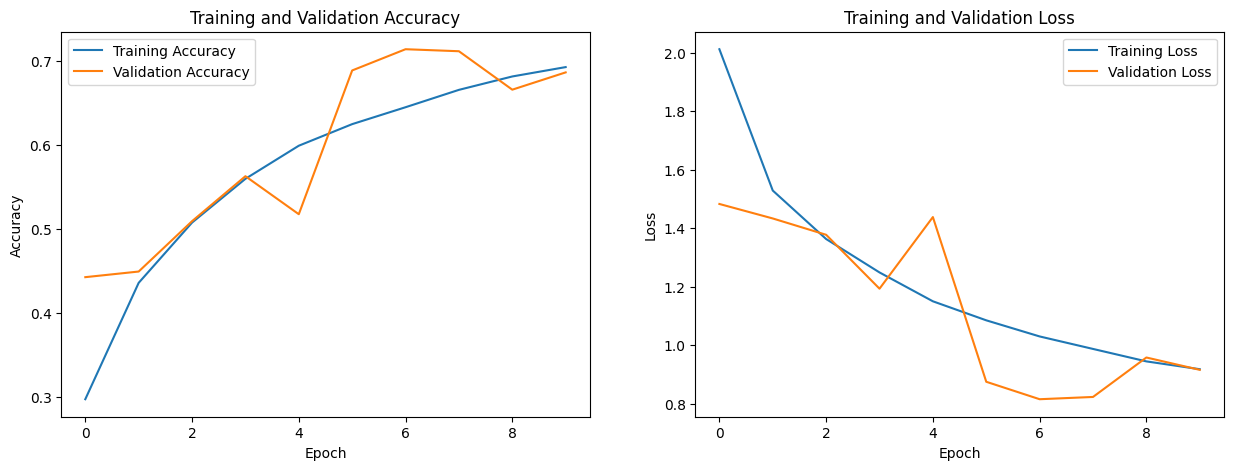

In [57]:
model = Sequential([
    Input(shape=(32, 32, 3)),

    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.35),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

plot_loss_and_accuracy(history=history)
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.3f}')

Let's try changing the batch_size from 64 to 128. 

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 52s 124ms/step - accuracy: 0.7101 - loss: 0.8638 - val_accuracy: 0.7400 - val_loss: 0.7681
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 49s 126ms/step - accuracy: 0.7261 - loss: 0.8191 - val_accuracy: 0.7329 - val_loss: 0.7849
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 48s 123ms/step - accuracy: 0.7286 - loss: 0.8060 - val_accuracy: 0.7454 - val_loss: 0.7536
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 48s 124ms/step - accuracy: 0.7387 - loss: 0.7874 - val_accuracy: 0.7219 - val_loss: 0.8102
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 52s 134ms/step - accuracy: 0.7421 - loss: 0.7723 - val_accuracy: 0.7561 - val_loss: 0.7184
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 50s 129ms/step - accuracy: 0.7476 - loss: 0.7556 - val_accuracy: 0.7864 - val_loss: 0.6209
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 51s 131ms/step - accuracy: 0.7521 - loss: 0.7464 - val_accuracy: 0.7813 - val_loss: 0.6451
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 50s 129ms/step - accuracy: 0.7542 - loss: 0

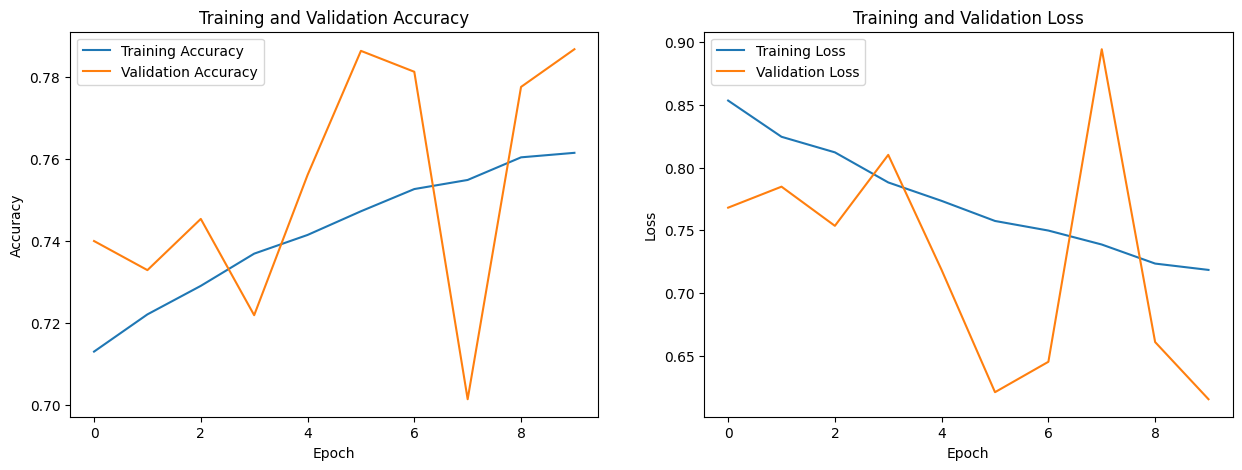

In [58]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

plot_loss_and_accuracy(history=history)
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.3f}')

Hooray, we finally got a significant improvement in the accuracy of our model - 78.7%.\
Let's try another optimizer.

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 50s 122ms/step - accuracy: 0.7172 - loss: 0.8580 - val_accuracy: 0.3564 - val_loss: 2.5762
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 48s 124ms/step - accuracy: 0.7513 - loss: 0.7579 - val_accuracy: 0.6685 - val_loss: 0.9481
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 46s 118ms/step - accuracy: 0.7623 - loss: 0.7225 - val_accuracy: 0.6747 - val_loss: 0.9879
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 46s 118ms/step - accuracy: 0.7667 - loss: 0.7066 - val_accuracy: 0.6872 - val_loss: 0.9314
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 46s 118ms/step - accuracy: 0.7636 - loss: 0.7149 - val_accuracy: 0.7855 - val_loss: 0.6283
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 46s 119ms/step - accuracy: 0.7676 - loss: 0.6974 - val_accuracy: 0.7034 - val_loss: 0.9157
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 47s 120ms/step - accuracy: 0.7735 - loss: 0.6896 - val_accuracy: 0.7418 - val_loss: 0.7487
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 47s 120ms/step - accuracy: 0.7726 - loss: 0

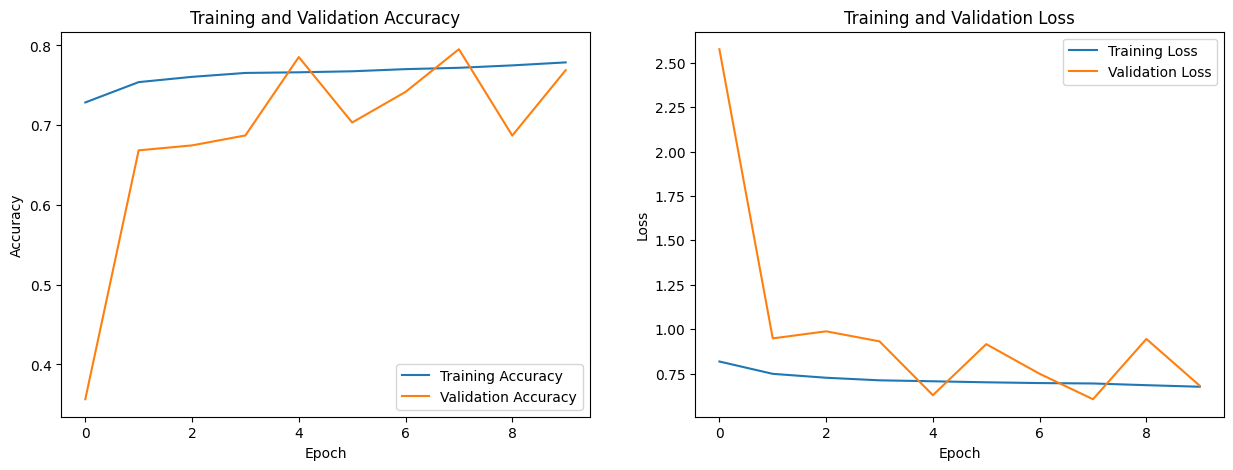

In [59]:
optimizer_ = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=optimizer_, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

plot_loss_and_accuracy(history=history)
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.3f}')

A very interesting result, but judging by this plateau in the figures, it's probably worth switching back to the adam otimizer.

Now let's make the version of the model, for which we will increase the number of filters in convolutional layers and the number of units in dense layers.\
And let's run 20 epochs.

Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 81s 195ms/step - accuracy: 0.2243 - loss: 2.5163 - val_accuracy: 0.1788 - val_loss: 2.6886
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 76s 194ms/step - accuracy: 0.4168 - loss: 1.5641 - val_accuracy: 0.5040 - val_loss: 1.3353
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 72s 183ms/step - accuracy: 0.5114 - loss: 1.3466 - val_accuracy: 0.5440 - val_loss: 1.2904
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 72s 184ms/step - accuracy: 0.5635 - loss: 1.2109 - val_accuracy: 0.5558 - val_loss: 1.2038
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 72s 184ms/step - accuracy: 0.6096 - loss: 1.0998 - val_accuracy: 0.6205 - val_loss: 1.0566
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 73s 187ms/step - accuracy: 0.6349 - loss: 1.0357 - val_accuracy: 0.6530 - val_loss: 0.9814
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 73s 185ms/step - accuracy: 0.6600 - loss: 0.9674 - val_accuracy: 0.6005 - val_loss: 1.1746
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 72s 185ms/step - accuracy: 0.6761 - loss: 0

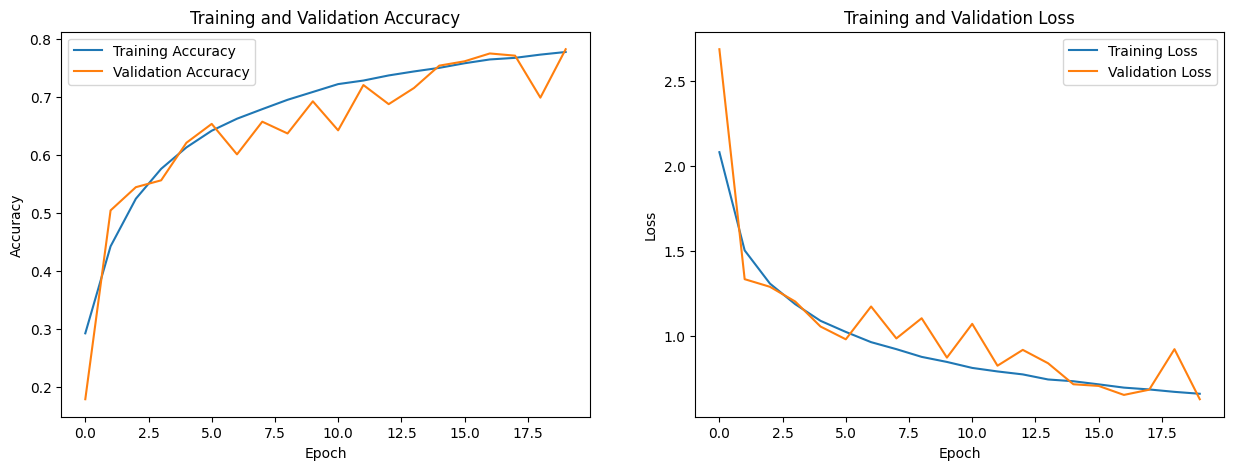

In [62]:
model = Sequential([
    Input(shape=(32, 32, 3)),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.35),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))

plot_loss_and_accuracy(history=history)
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.3f}')

Hmm, I expected a better result. Let's try a different model structure.

Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 52s 122ms/step - accuracy: 0.2346 - loss: 2.4367 - val_accuracy: 0.2298 - val_loss: 2.2481
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 49s 125ms/step - accuracy: 0.4561 - loss: 1.4816 - val_accuracy: 0.4995 - val_loss: 1.3964
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 49s 124ms/step - accuracy: 0.5576 - loss: 1.2379 - val_accuracy: 0.6083 - val_loss: 1.0919
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 49s 124ms/step - accuracy: 0.6196 - loss: 1.0973 - val_accuracy: 0.6287 - val_loss: 1.0630
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 48s 123ms/step - accuracy: 0.6596 - loss: 0.9833 - val_accuracy: 0.6099 - val_loss: 1.2245
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 49s 124ms/step - accuracy: 0.6887 - loss: 0.9055 - val_accuracy: 0.6792 - val_loss: 0.9411
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 51s 131ms/step - accuracy: 0.7205 - loss: 0.8213 - val_accuracy: 0.7091 - val_loss: 0.8548
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 52s 132ms/step - accuracy: 0.7362 - loss: 0

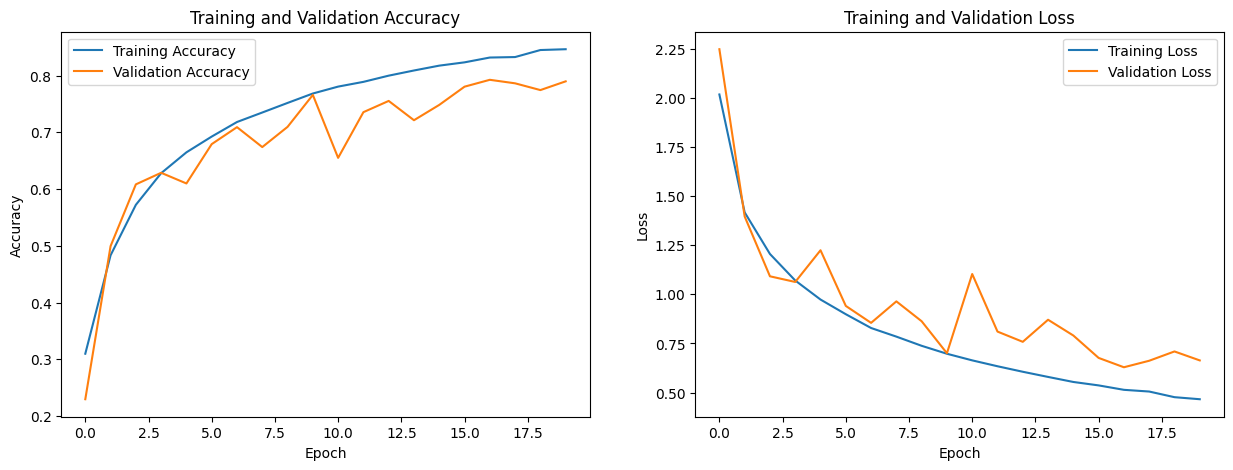

In [63]:
model = Sequential([
    Input(shape=(32, 32, 3)),

    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.30),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.40),

    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))

plot_loss_and_accuracy(history=history)
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.3f}')

Good, 79%.

And now the final one!

Epoch 1/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 56s 132ms/step - accuracy: 0.2069 - loss: 2.6025 - val_accuracy: 0.1856 - val_loss: 2.5734
Epoch 2/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 50s 127ms/step - accuracy: 0.4053 - loss: 1.6040 - val_accuracy: 0.5032 - val_loss: 1.3233
Epoch 3/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 50s 127ms/step - accuracy: 0.5010 - loss: 1.3691 - val_accuracy: 0.4518 - val_loss: 1.7332
Epoch 4/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 50s 127ms/step - accuracy: 0.5601 - loss: 1.2290 - val_accuracy: 0.5409 - val_loss: 1.2857
Epoch 5/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 49s 126ms/step - accuracy: 0.6074 - loss: 1.1128 - val_accuracy: 0.4586 - val_loss: 1.6125
Epoch 6/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 49s 125ms/step - accuracy: 0.6308 - loss: 1.0423 - val_accuracy: 0.6611 - val_loss: 0.9479
Epoch 7/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 49s 126ms/step - accuracy: 0.6578 - loss: 0.9784 - val_accuracy: 0.6557 - val_loss: 0.9793
Epoch 8/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 49s 126ms/step - accuracy: 0.6764 -

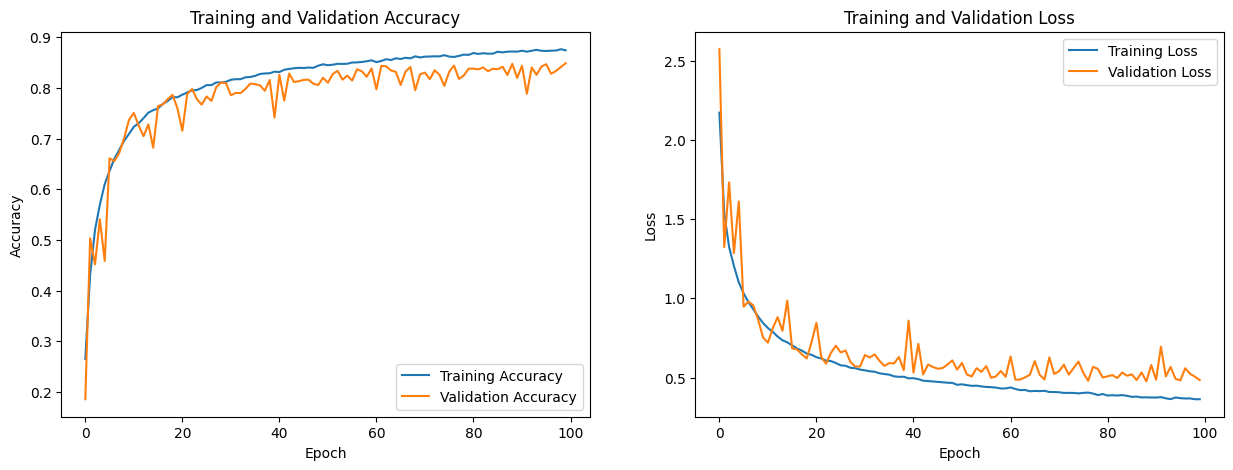

In [64]:
model = Sequential([
    Input(shape=(32, 32, 3)),

    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.20),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.30),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.35),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.40),

    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=100, batch_size=128, validation_data=(x_test, y_test))

plot_loss_and_accuracy(history=history)
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.3f}')

Unbelievable! A significant result of 84.9% accuracy was achieved.\
As you can see, the training was relatively stable.\
Naturally, the accuracy on the test is lower than on the training.\
However, the difference is not too great due to regularization.\
This is quite a good indicator, because I personally do not always recognize what is drawn on those compressed pictures, Heh).

Let's take a look at specific examples of predictions.

In [69]:
prediction = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


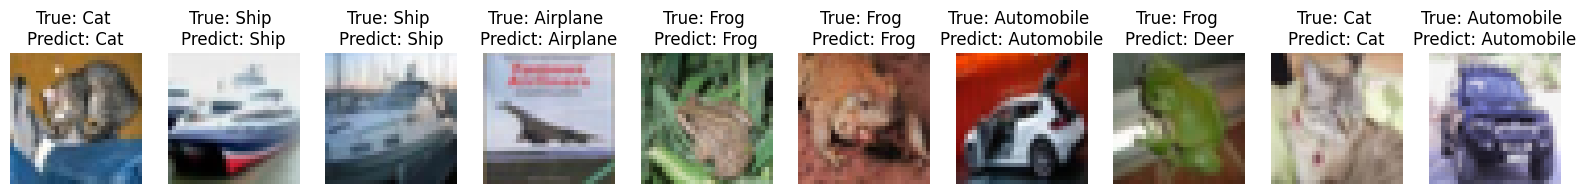

In [81]:
Y_pred_classes = np.argmax(prediction, axis=1) 
Y_true = np.argmax(y_test, axis=1)

fig, axes = plt.subplots(1, 10, figsize=(20,5))
axes = axes.ravel()
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
for i in np.arange(0, 10):
    axes[i].imshow(x_test[i])
    axes[i].set_title(f"True: {labels[Y_true[i]]} \nPredict: {labels[Y_pred_classes[i]]}")
    axes[i].axis('off')

As you can see, the model is mostly good at guessing, but sometimes it is wrong (Frog != Deer).

#### Summary

So, in this notebook, we have considered the CIFAR-10 dataset. We tried different neural network architectures for this task. We experimented with different hyperparameters, optimizers, and saw and analyzed the impact of each. Model complications did not always bring improvements in accuracy, sometimes they even worsened it, but we managed to achieve a significant result of almost ~85%! This is a pretty good result, but clearly not the best. In the future, we can try to conduct more experiments with architecture and optimizers, and try pre-trained models. Thank you for reading. Good luck.